In [1]:
import tensorflow as tf

In [2]:
X = tf.range(-100, 100, 4)
y = X + 10

In [9]:
# split the data into test and train
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [4]:
import matplotlib.pyplot as plt

def plot_prediction(train_data, train_label, test_data, test_label, predictions):
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_label, c="b", label="trainning data")
  plt.scatter(test_data, test_label, c="g", label="test data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  plt.legend()
  # return


In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1], name="input_1_layer", activation=" "),
    tf.keras.layers.Dense(1, name="output_1_layer")
])

model.compile(loss="mae",
              optimizer="SGD",
              metrics=["mae"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_1_layer (Dense)                │ (None, 50)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_1_layer (Dense)               │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153 (616.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

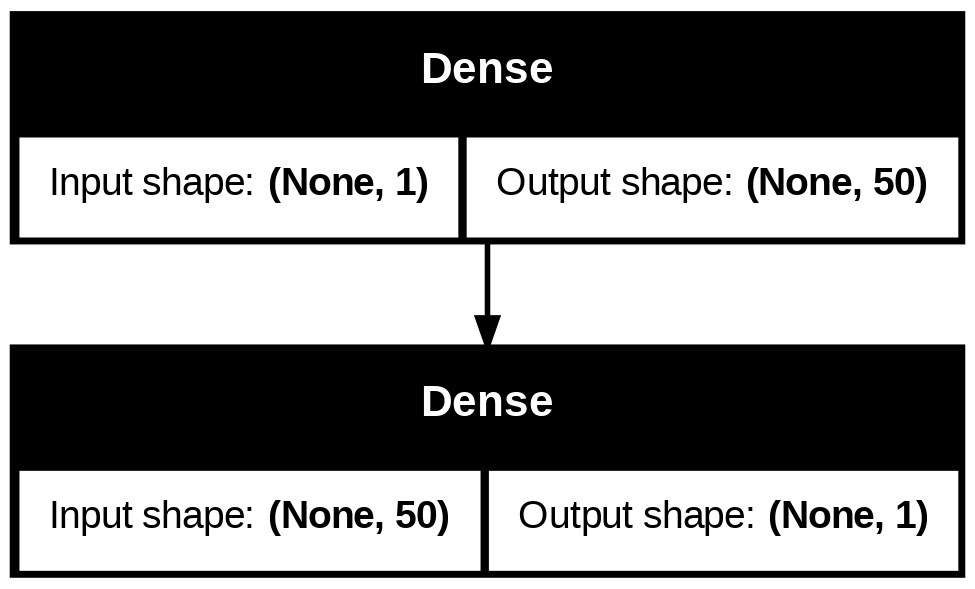

In [30]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [26]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=50, verbose=0)

In [27]:
predict = model.predict(X_test)
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[ 71.3803  ],
       [ 76.07425 ],
       [ 80.7682  ],
       [ 85.462166],
       [ 90.15613 ],
       [ 94.85007 ],
       [ 99.54402 ],
       [104.23797 ],
       [108.93192 ],
       [113.625885]], dtype=float32)

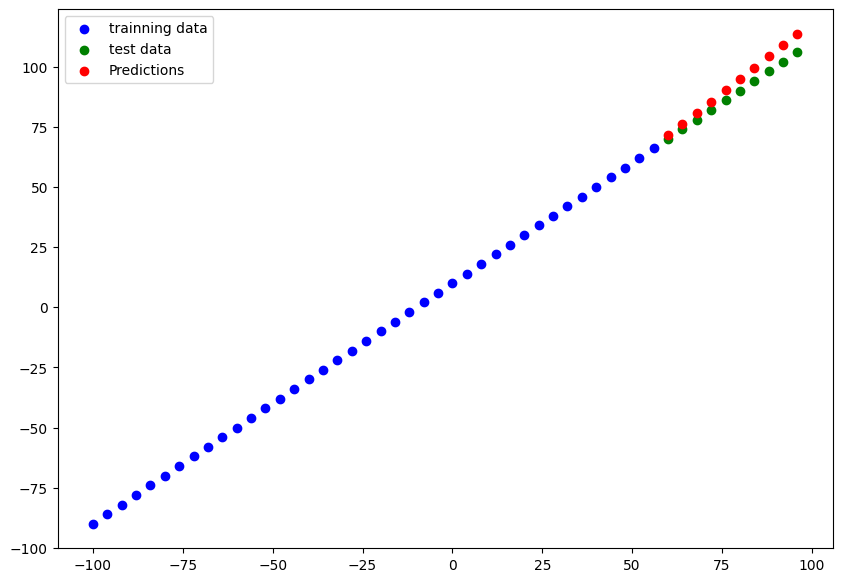

In [28]:
plot_prediction(X_train, y_train, X_test, y_test, predict)